In [1]:
import os
import torchio as tio

from mbas.data.nifti import make_subject
from mbas.visualize.subject import plot_subject_with_label

%load_ext autoreload
%autoreload 2

import numpy as np
import pickle

2024-06-06 19:52:38.916902: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-06 19:52:38.941264: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 19:52:39.329390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
nnunet_encM_3d_fullres_250 = "/home/bryan/expr/nnUNet_results/Dataset102_MBAS/nnUNetTrainer_250epochs__nnUNetResEncUNetMPlans__3d_fullres/fold_0/validation"

nnunet_only_atrium = "/home/bryan/expr/nnUNet_results/Dataset103_MBAS/nnUNetTrainer_250epochs__nnUNetResEncUNetMPlans__3d_fullres/fold_0/validation"

In [16]:
subject_id = "MBAS_007"
subject = make_subject(
    f"/home/bryan/data/MBAS/Training/{subject_id}",
    "train",
)

In [17]:
subject.add_image(
    tio.LabelMap(path=os.path.join(nnunet_encM_3d_fullres_250, f"{subject_id}.nii.gz")),
    "encM_3d_fullres_250"
)
subject.add_image(
    tio.LabelMap(path=os.path.join(nnunet_only_atrium, f"{subject_id}.nii.gz")),
    "only_atrium"
)

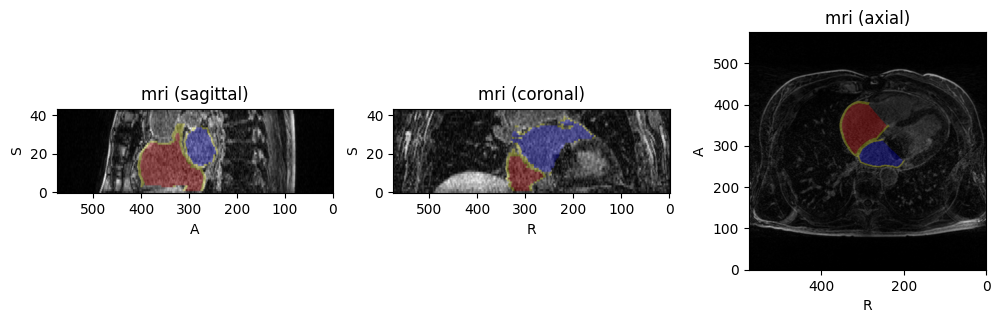

In [18]:
plot_subject_with_label(
    subject,
    show=True,
    add_metadata=False,
    add_segmentation_legend=False,
#     single_axis="axial",
    label_key="label",
    cmap="mbas",
    indices = (300, 300, 15),
    figsize=(10,3)
);

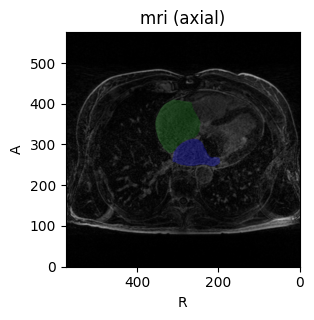

In [19]:
plot_subject_with_label(
    subject,
    show=True,
    add_metadata=False,
    add_segmentation_legend=False,
    single_axis="axial",
    label_key="encM_3d_fullres_250",
    cmap="mbas_hierarchical",
    indices = (300, 300, 15),
    figsize=(10,3)
);

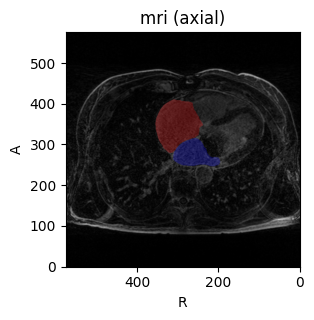

In [20]:
plot_subject_with_label(
    subject,
    show=True,
    add_metadata=False,
    add_segmentation_legend=False,
    single_axis="axial",
    label_key="only_atrium",
    cmap="mbas_only_atrium",
    indices = (300, 300, 15),
    figsize=(10,3)
);

In [23]:
from mbas.data.constants import MBAS_HIERARCHICAL_LABELS, MBAS_HIERARCHICAL_LABEL_COLORS

In [24]:
MBAS_HIERARCHICAL_LABEL_COLORS

OrderedDict([(0, 'black'),
             (1, 'yellow'),
             (2, 'red'),
             (3, 'blue'),
             (4, 'green')])

In [25]:
dict(MBAS_HIERARCHICAL_LABELS)

{0: 'Background',
 1: 'Left Atrium Wall',
 2: 'Right Atrium Cavity',
 3: 'Left Atrium Cavity',
 4: 'Right Atrium Wall'}

In [ ]:
image_npz["probabilities"].shape

In [ ]:
path_pkl = os.path.join(nnunet_validation_folder, "MBAS_005.pkl")
with open(path_pkl, "rb") as f:
    image_pkl = pickle.load(f)

In [ ]:
image_pkl.keys()

In [2]:
pred_next_stage_npz = "/home/bryan/expr/nnUNet_results/Dataset101_MBAS/nnUNetTrainer__nnUNetPlans__3d_lowres/predicted_next_stage/3d_cascade_fullres/MBAS_005.npz"
pred_next_stage = np.load(pred_next_stage_npz)

In [3]:
pred_next_stage["seg"].shape

(44, 574, 574)

In [4]:
pred_next_stage

NpzFile '/home/bryan/expr/nnUNet_results/Dataset101_MBAS/nnUNetTrainer__nnUNetPlans__3d_lowres/predicted_next_stage/3d_cascade_fullres/MBAS_005.npz' with keys: seg

In [41]:
set(pred_next_stage["seg"].flatten())

{0, 1, 2, 3}

In [42]:
full_npz = "/home/bryan/expr/nnUNet_results/Dataset101_MBAS/nnUNetTrainer_250epochs__nnUNetPlans__3d_fullres/fold_0/validation/MBAS_005.npz"
full = np.load(full_npz)

In [44]:
full

NpzFile '/home/bryan/expr/nnUNet_results/Dataset101_MBAS/nnUNetTrainer_250epochs__nnUNetPlans__3d_fullres/fold_0/validation/MBAS_005.npz' with keys: probabilities

In [46]:
full["probabilities"].shape

(4, 44, 576, 576)

In [47]:
full_nii_gz = "/home/bryan/expr/nnUNet_results/Dataset101_MBAS/nnUNetTrainer_250epochs__nnUNetPlans__3d_fullres/fold_0/validation/MBAS_005.nii.gz"
full_label = tio.LabelMap(full_nii_gz)

In [49]:
set(full_label.data.numpy().flatten())

{0, 1, 2, 3}

In [ ]:
os.makedi